# TensorBoard

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import warnings
warnings.filterwarnings("ignore")

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

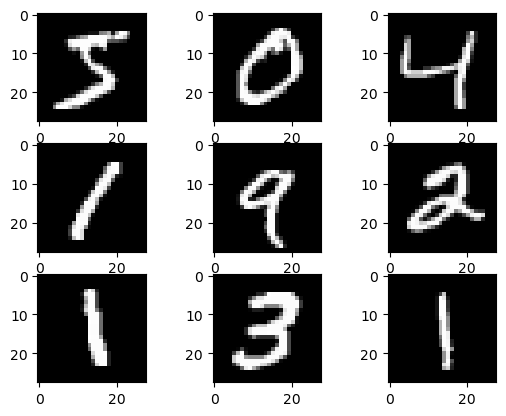

In [6]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the pixel values to be between 0 and 1
X_train = x_train / 255.0
X_test = x_test / 255.0
# plot the first 9 images in the training set
import matplotlib.pyplot as plt


In [10]:
# create the model using convolutional layers, max pooling layers, and a dropout layer

model=Sequential([
    tf.keras.layers.Conv2D(10, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
                                 
    tf.keras.layers.Conv2D(10,(3,3), activation="relu"),
    tf.keras.layers.Conv2D(10,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((1,1)), # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [12]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
# train the model
history=model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.5628 - loss: 1.2180 - val_accuracy: 0.9445 - val_loss: 0.1925
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8443 - loss: 0.4751 - val_accuracy: 0.9615 - val_loss: 0.1416
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8709 - loss: 0.3989 - val_accuracy: 0.9647 - val_loss: 0.1245
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8866 - loss: 0.3527 - val_accuracy: 0.9713 - val_loss: 0.1029
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9080 - loss: 0.3011 - val_accuracy: 0.9737 - val_loss: 0.1020


In [13]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9691 - loss: 0.1185
Test accuracy 0.9736999869346619


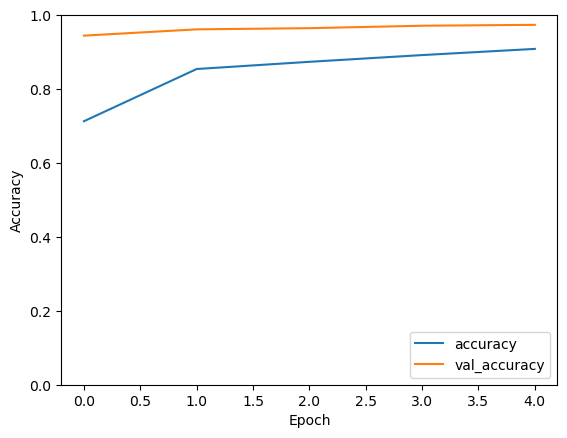

In [15]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

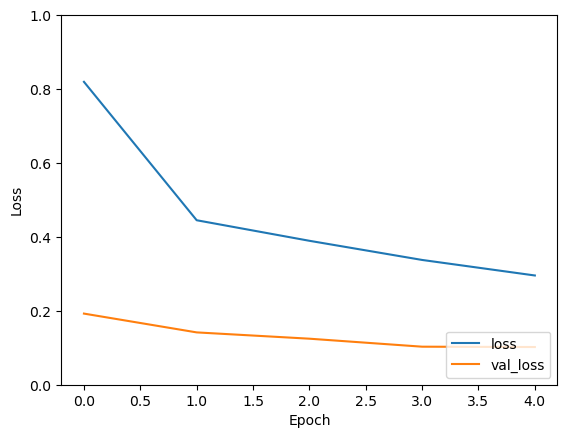

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

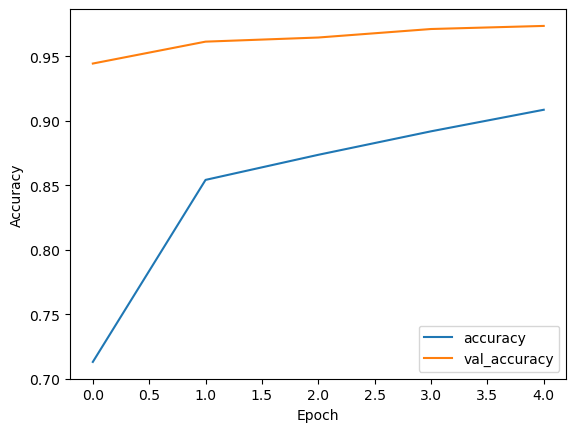

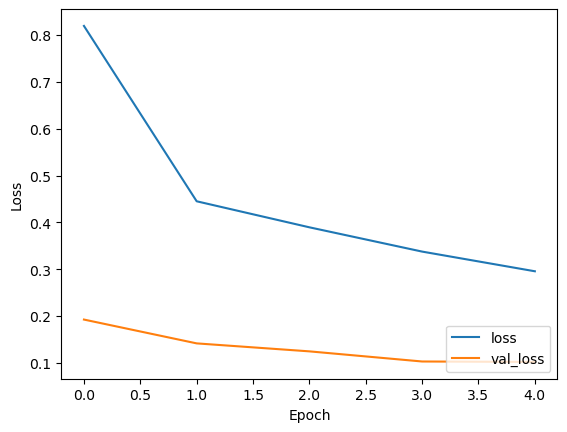

In [17]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Let's do it in tensorboard